In [1]:
import pandas as pd

In [2]:
path = r'C:\Users\AmineKassimi\Documents\Data_Mining_TPs\final_df.csv'
final_df = pd.read_csv(path)

In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307082 entries, 0 to 307081
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               307082 non-null  int64  
 1   age                      307082 non-null  float64
 2   sex                      307082 non-null  int64  
 3   city                     307082 non-null  int64  
 4   country                  307082 non-null  int64  
 5   latitude                 307082 non-null  float64
 6   longitude                307082 non-null  float64
 7   geo_resolution           307082 non-null  int64  
 8   chronic_disease_binary   307082 non-null  bool   
 9   outcome                  307082 non-null  int64  
 10  data_moderator_initials  307082 non-null  int64  
 11  travel_history_binary    307082 non-null  bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 24.0 MB


In [4]:
colomns = ['age' ,'sex', 'city','country','latitude','longitude','geo_resolution','chronic_disease_binary',
           'data_moderator_initials','travel_history_binary']
Y = final_df['outcome'].to_numpy()
X=final_df[colomns].to_numpy()


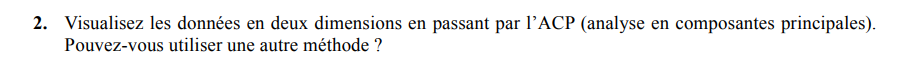

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import scale, MinMaxScaler

In [6]:
minmax = MinMaxScaler(feature_range=(0, 1), copy=True)
X_normalize = minmax.fit(X)
X_normalize = X_normalize.transform(X)

In [7]:
#analyse en composantes principales PCA

pca = PCA()
algo_PCA = pca.fit(X_normalize, Y)
algo_PCA = algo_PCA.transform(X_normalize)

In [8]:
len(algo_PCA)

307082

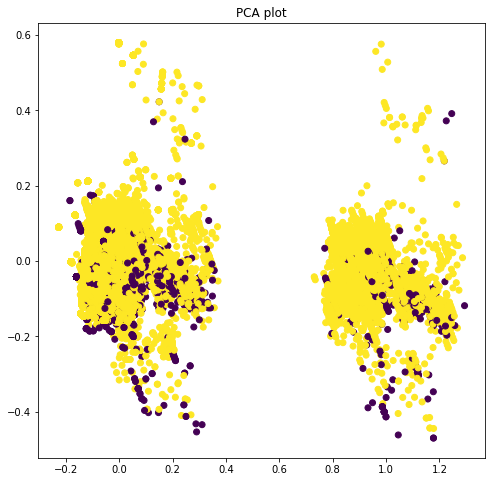

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(algo_PCA[:,2], algo_PCA[:,6], c=Y)
plt.title('PCA plot')

plt.show()

In [10]:
#Nous pouvons aussi utliser LDA pour cette tache mais on a ici le nombre de classes egal a 2 
#et d'après la documentation de lda dans sklearn le nombre de composant doit etre < nbre_classes - 1 et ce n'est pas le cas
#dans cette exercice. c'est pour ca nous pouvons pas afficher le plot de LDA

lda = LDA()
algo_LDA = lda.fit(X_normalize, Y)
algo_LDA = algo_LDA.transform(X_normalize)
print(algo_LDA)

[[ -4.46246553]
 [-10.17610885]
 [ -4.33264434]
 ...
 [-14.7835723 ]
 [-11.06267456]
 [ -8.5536566 ]]


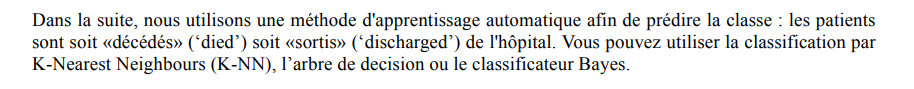

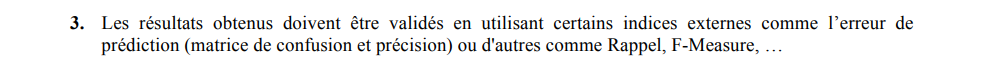

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [12]:
# diviser les données en deux partie (train & Test)

X_train2, X_test2, y_train2, y_test2 = train_test_split(algo_PCA, Y, test_size=0.3, random_state=42)

# ****************************** Algorithme "KNN" ****************************** 

# Appliquer l'algo avec les données de la PCA

In [15]:
KNN_algo2 = KNeighborsClassifier(n_neighbors=2)
knn_fited2 = KNN_algo2.fit(X_train2, y_train2)

In [16]:
knn_predicted2 = knn_fited2.predict(X_test2)

In [17]:
#accuracy
accuracy2 = accuracy_score(y_test2,knn_predicted2)
print(f"accuracy knn :{round(accuracy2*100,2)}%")

accuracy knn :99.36%


<AxesSubplot:>

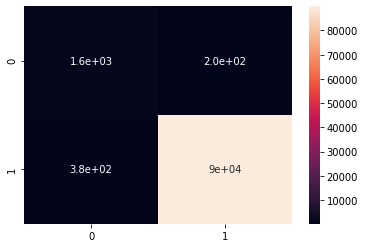

In [18]:
cm2 = confusion_matrix(y_test2, knn_predicted2)
sns.heatmap(cm2, annot=True)

# Avec des données Normalisé avec MinMaxScaler

In [20]:
KNN_algo = KNeighborsClassifier(n_neighbors=2)
knn_fited = KNN_algo.fit(X_train2, y_train2)


In [21]:
knn_predicted = knn_fited.predict(X_test2)

In [46]:
#accuracy __ Mesurer la précision
accuracy = accuracy_score(y_test,knn_predicted)
print(f"accuracy knn :{round(accuracy*100,2)}%")

accuracy knn :99.33%


In [22]:
# Mesurer F1_score
score_f1 = f1_score(y_test2, knn_predicted)
print(f'f1_score de KNN : {round(score_f1*100,2)}%')

f1_score de KNN : 99.67%


<AxesSubplot:>

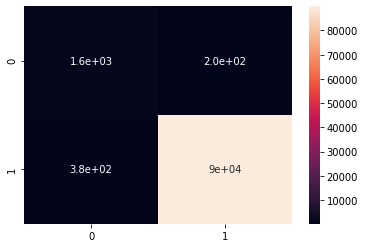

In [23]:
#Matrice de confusion
cm = confusion_matrix(y_test2, knn_predicted)
sns.heatmap(cm, annot=True)

# ** Naive Bayes Classifier **

In [24]:
NBC = GaussianNB()
NBC_fited = NBC.fit(X_train2, y_train2)

In [25]:
NBC_predicted = NBC_fited.predict(X_test2)

In [26]:
#accuracy __ Mesurer la précision
accuracyNBC = accuracy_score(y_test2,NBC_predicted)
print(f"accuracy NBC :{round(accuracyNBC*100,2)}%")

accuracy NBC :97.09%


In [27]:
# Mesurer F1_score
score_f1 = f1_score(y_test2, NBC_predicted)
print(f'f1_score de naive bayes : {round(score_f1*100,2)}%')

f1_score de naive bayes : 98.49%


<AxesSubplot:>

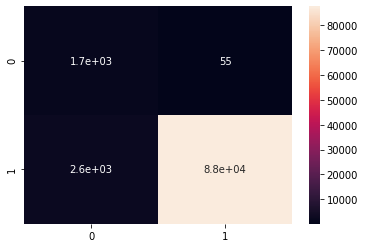

In [28]:
#Matrice de confusion
cm = confusion_matrix(y_test2, NBC_predicted)
sns.heatmap(cm, annot=True)

# ** Arbre de Décision **

In [29]:
DTC= DecisionTreeClassifier()
DTC_fited = DTC.fit(X_train2,y_train2)

In [30]:
DTC_predicted = DTC_fited.predict(X_test2)

In [31]:
#accuracy __ Mesurer la précision
accuracyDTC = accuracy_score(y_test2,DTC_predicted)
print(f"accuracy arbre de décision  :{round(accuracyDTC*100,2)}%")

accuracy arbre de décision  :99.47%


In [32]:
# Mesurer F1_score
score_f1 = f1_score(y_test2, DTC_predicted)
print(f'f1_score d\'arbre de décision : {round(score_f1*100,2)}%')

f1_score d'arbre de décision : 99.73%


<AxesSubplot:>

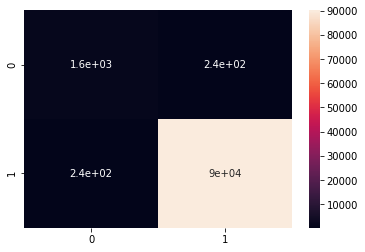

In [33]:
#Matrice de confusion
cm = confusion_matrix(y_test2, DTC_predicted)
sns.heatmap(cm, annot=True)

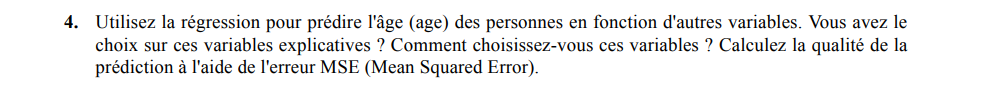

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307082 entries, 0 to 307081
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               307082 non-null  int64  
 1   age                      307082 non-null  float64
 2   sex                      307082 non-null  int64  
 3   city                     307082 non-null  int64  
 4   country                  307082 non-null  int64  
 5   latitude                 307082 non-null  float64
 6   longitude                307082 non-null  float64
 7   geo_resolution           307082 non-null  int64  
 8   chronic_disease_binary   307082 non-null  bool   
 9   outcome                  307082 non-null  int64  
 10  data_moderator_initials  307082 non-null  int64  
 11  travel_history_binary    307082 non-null  bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 24.0 MB


In [35]:
colomns = ['sex', 'city','country','latitude','longitude','geo_resolution','chronic_disease_binary',
           'data_moderator_initials','travel_history_binary','outcome']
Yage = final_df['age'].to_numpy()
Xage=final_df[colomns].to_numpy()

In [36]:
minmax = MinMaxScaler(feature_range=(0, 1), copy=True)
Xage_normalize = minmax.fit(Xage)
Xage_normalize = Xage_normalize.transform(Xage)

# RFE (Recursive Feature Elimination)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    #X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    X_trainAge, X_testAge, y_trainAge, y_testAge = train_test_split(Xage_normalize, Yage, test_size=0.3, random_state=0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_trainAge,y_trainAge)
    X_test_rfe = rfe.transform(X_testAge)
    model.fit(X_train_rfe,y_trainAge)
    score = model.score(X_test_rfe,y_testAge)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will 

Optimum number of features: 9
Score with 9 features: 0.388187


# Utilisation de RFE pour le choix des variables

In [39]:
cols = ['sex', 'city','country','latitude','longitude','geo_resolution','chronic_disease_binary',
           'data_moderator_initials','travel_history_binary','outcome']
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 9)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(Xage_normalize,Yage)  
#Fitting the data to model
model.fit(X_rfe,Yage)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['sex', 'city', 'latitude', 'longitude', 'geo_resolution',
       'chronic_disease_binary', 'data_moderator_initials',
       'travel_history_binary', 'outcome'],
      dtype='object')


# Linear Regression pour l'age

In [40]:
X_trainAge, X_testAge, y_trainAge, y_testAge = train_test_split(X_rfe, Yage, test_size=0.3, random_state=0)
regression_model = LinearRegression()
fited_model= regression_model.fit(X_trainAge,y_trainAge)
y_predicted = fited_model.predict(X_testAge)

# MSE (Mean Squared Error)

In [41]:
MSE= mean_squared_error(y_testAge, y_predicted)
MSE

32.26453598096577

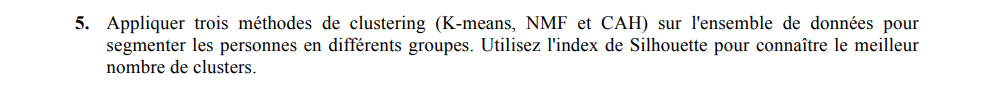

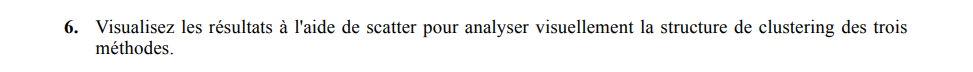

In [10]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score

# ** K-Means **

In [43]:
#les données de la PCA de la premiere partie.
DATA=algo_PCA
kmeans_algo = KMeans(n_clusters=2).fit(DATA)
kmeans_algo.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
np.unique(kmeans_algo.labels_ , return_counts=True)

(array([0, 1]), array([192930, 114152], dtype=int64))

Text(0.5, 1.0, 'Affichage des Clusters pour K-Means')

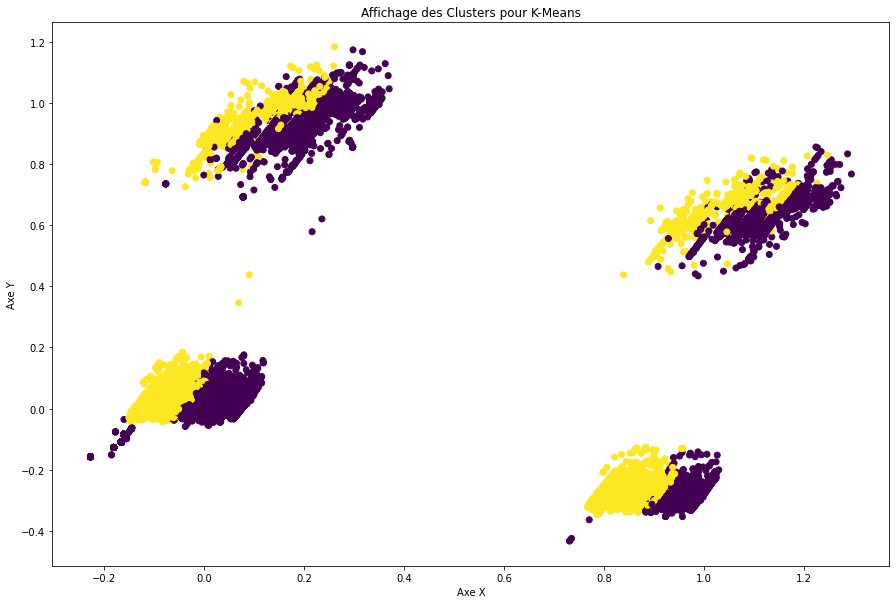

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(DATA[:,2],DATA[:,3],c=kmeans_algo.labels_)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage des Clusters pour K-Means")

#  *** l'indice de silhouette ***

In [ ]:
# !!!! Il prend beaucoup de temps et de memoire 
silhouette = []
nbr_Clusters = range(2,6)
for k in nbr_Clusters:
        kmeans_algo = KMeans(n_clusters=2).fit(DATA)
        silhouette.append(silhouette_score(DATA  , kmeans_algo.labels_))

print("le meilleur nbr de clusters est :",nbr_Clusters[np.argmax(silhouette)])

# ** CAH __ Aglomerative Clustring algorithm  **

In [46]:
# Choisir aleatoirement 10000 données de  DATA 
random_lines=np.random.choice(range(len(DATA)), size=10000, replace=False)
new_DATA=DATA[random_lines]

In [47]:
CAH = AgglomerativeClustering(n_clusters=2)
CAH_fited = CAH.fit(new_DATA)
CAH_fited.labels_

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

Text(0.5, 1.0, 'Affichage des Clusters pour CAH')

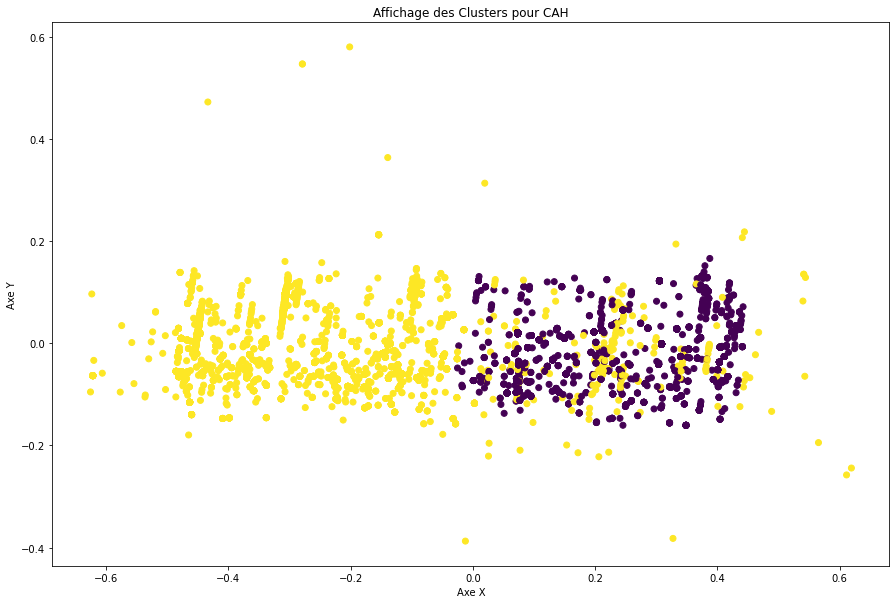

In [48]:
plt.figure(figsize=(15,10))
plt.scatter(new_DATA[:,0],new_DATA[:,6],c=CAH_fited.labels_)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage des Clusters pour CAH")

# ** NMF algorithm **

In [11]:
nmf_algo = NMF(n_components=2, init='random', random_state=0)
W = nmf_algo.fit_transform(X_normalize)
H = nmf_algo.components_

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [16]:
labels=[]
for proba1,proba2 in W:
    if proba1 > proba2:
        labels.append(0)
    else:
        labels.append(1)

Text(0.5, 1.0, 'Affichage des Clusters pour NMF')

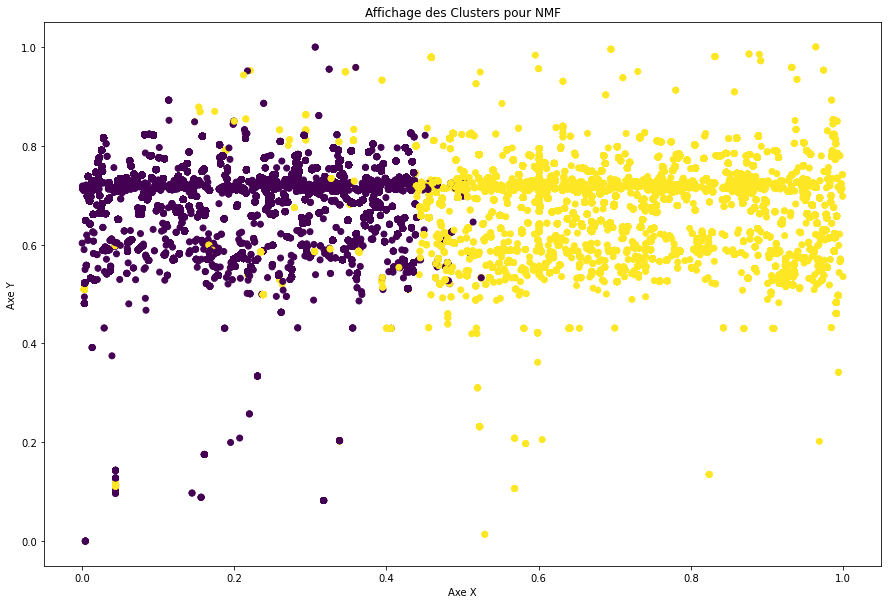

In [20]:
plt.figure(figsize=(15,10))
plt.scatter(X_normalize[:,2],X_normalize[:,4],c=labels)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage des Clusters pour NMF")

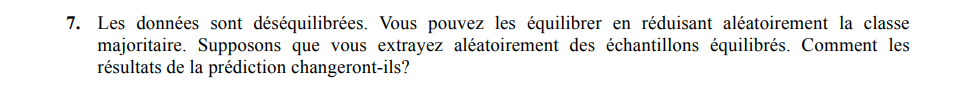

In [21]:
final_df

,Unnamed: 0,age,sex,city,country,latitude,longitude,geo_resolution,chronic_disease_binary,outcome,data_moderator_initials,travel_history_binary
0,0,60.0,1,2003,9,22.365019,114.133808,4,False,0,0,False
1,1,78.0,1,2287,22,45.297748,11.658382,4,False,0,0,False
2,2,61.0,0,1504,32,1.353460,103.815100,0,False,1,0,False
3,113,28.0,1,1504,32,1.353460,103.815100,0,False,1,0,False
4,224,56.0,0,1504,32,1.353460,103.815100,0,False,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
307077,670224,80.0,0,498,39,44.461123,-73.081581,2,False,0,0,False
307078,672529,64.5,1,1668,39,44.003584,-102.826120,2,False,0,0,False
307079,672651,94.5,0,1077,39,47.491332,-121.803640,2,False,0,0,False
307080,672674,70.0,1,1408,39,45.546910,-122.414900,2,False,0,0,False


In [22]:
colomns = ['age' ,'sex', 'city','country','latitude','longitude','geo_resolution','chronic_disease_binary',
           'data_moderator_initials','travel_history_binary','outcome']
final_df=final_df[colomns]
new_df1=final_df[final_df['outcome']==1].to_numpy()
new_df0=final_df[final_df['outcome']==0].to_numpy()

In [23]:
len(new_df1)

301073

In [24]:
print(len(final_df[final_df['outcome']==1]),len(new_df0))

301073 6009


In [25]:
# Choisir aleatoirement 6009 lignes de  new_df1 

random_lines=np.random.choice(range(301073), size=6009, replace=False)
new_df1=new_df1[random_lines]


In [26]:
new_df1

array([[30.0, 1, 709, ..., 3, False, 1],
       [30.0, 1, 1410, ..., 3, False, 1],
       [30.0, 1, 1410, ..., 3, False, 1],
       ...,
       [30.0, 1, 467, ..., 3, False, 1],
       [30.0, 1, 1410, ..., 3, False, 1],
       [30.0, 1, 773, ..., 3, False, 1]], dtype=object)

In [27]:
print(new_df1[:,0:10].shape,new_df0[:,0:10].shape)


(6009, 10) (6009, 10)


In [28]:
#Concatenation des deux listes
new_dframe=list(new_df1[:,0:10])
Y=list(new_df1[:,10])

for el in new_df0[:,10]:
    Y.append(el)
    
for elem in new_df0[:,0:10]:
    
    new_dframe.append(elem)

In [29]:
#les nouvelles données equilibrées
len(Y)

12018

In [30]:
minmax2 = MinMaxScaler(feature_range=(0, 1), copy=True)
X_norm = minmax2.fit(new_dframe)
X_norm = X_norm.transform(new_dframe)

In [31]:
#analyse en composantes principales PCA

pca2 = PCA()
algo_PCA2 = pca2.fit(X_norm, Y)
algo_PCA2 = algo_PCA2.transform(X_norm)

# k-Means

In [268]:
kmeans_algo2 = KMeans(n_clusters=2).fit(algo_PCA2)
kmeans_algo2.labels_

array([1, 1, 1, ..., 0, 0, 0])

Text(0.5, 1.0, 'Affichage des Clusters pour knn data equilirèes')

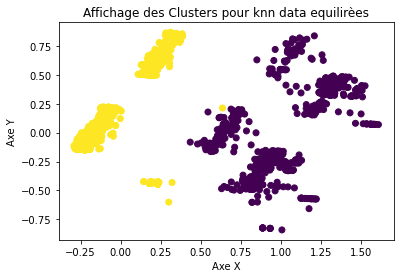

In [276]:
plt.figure()
plt.scatter(algo_PCA2[:,0],algo_PCA2[:,2],c=kmeans_algo2.labels_)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage des Clusters pour knn data equilirèes")

# NB: les resultats sont très bon qu'avant

# ** CAH2 __ Aglomerative Clustring algorithm  **

In [277]:
CAH2 = AgglomerativeClustering(n_clusters=2)
CAH2_fited = CAH2.fit(algo_PCA2)
CAH2_fited.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Affichage des Clusters pour CAH')

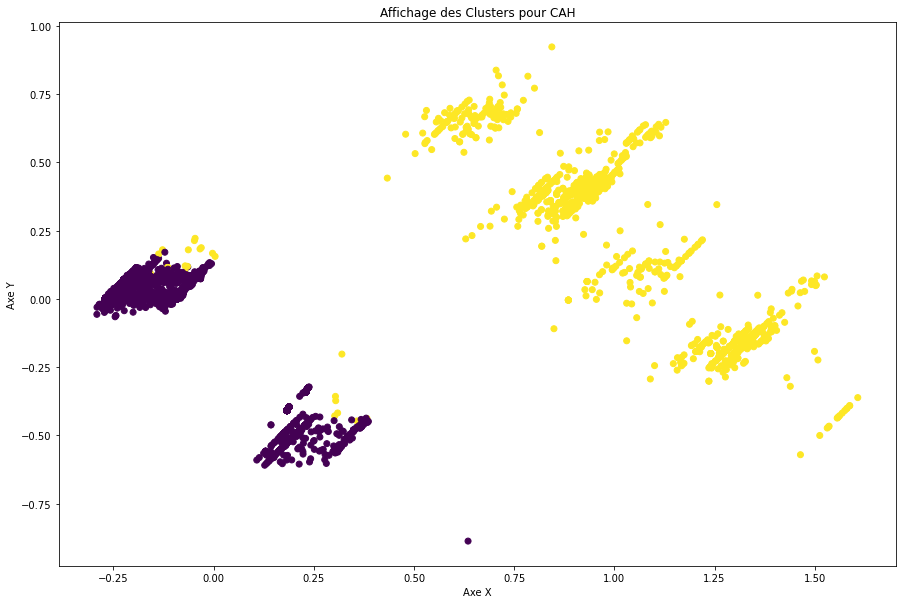

In [296]:
plt.figure(figsize=(15,10))
plt.scatter(algo_PCA2[:,0],algo_PCA2[:,3],c=CAH2_fited.labels_)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage des Clusters pour CAH")

# NMF 2 algorithm

In [32]:
nmf_algo2 = NMF(n_components=2, init='random', random_state=0)
W2 = nmf_algo2.fit_transform(X_norm)
H2 = nmf_algo2.components_

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [33]:
labels2=[]
for proba1,proba2 in W2:
    if proba1 > proba2:
        labels2.append(0)
    else:
        labels2.append(1)

Text(0.5, 1.0, 'Affichage des Clusters pour NMF2')

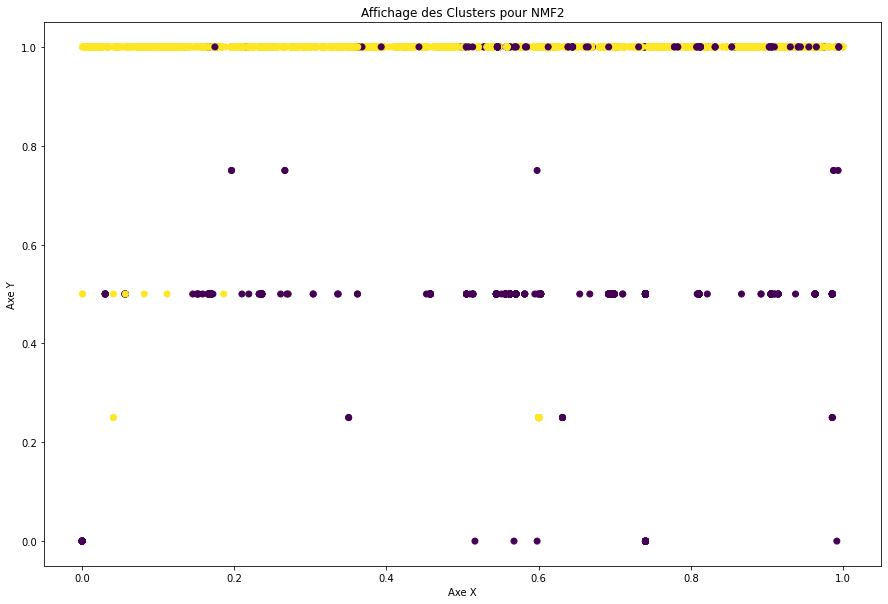

In [60]:
plt.figure(figsize=(15,10))
plt.scatter(X_norm[:,2],X_norm[:,6],c=labels2)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage des Clusters pour NMF2")

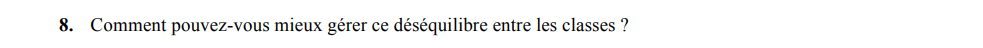

# 1)  Collecter davantage de données
# 2)  Utiliser des méthodes de rééchantillonnage:
    On a deux techniques (Le sur-échantillonnage : "Oversampling" et le sous-échantillonnage :"Undersampling". )

       #Les méthodes d’Oversampling fonctionnent en augmentant le nombre d’observations de la (des) classe(s) 
       #minoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.

       #Les méthodes d’Undersampling fonctionnent en diminuant le nombre d’observations
       #de la  (des) classe(s) majoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.
# 3)  La génération d’échantillons synthétiques (SMOT)

SMOTE (pour Synthetic Minority Over-sampling Technique). Comme son nom l’indique, SMOTE est une méthode de sur-échantillonnage. 
Elle fonctionne en créant des échantillons synthétiques à partir de la classe minoritaire au lieu de créer de simples copies.
    

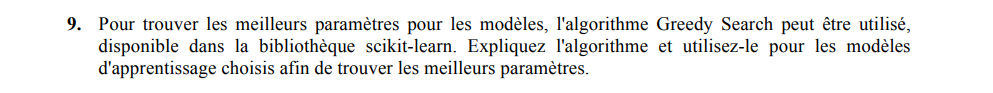

Un algorithme glouton est tout algorithme qui suit l'heuristique de résolution de problèmes consistant à faire le choix localement optimal à chaque étape. [1] Dans de nombreux problèmes, une stratégie gourmande ne produit généralement pas une solution optimale, mais néanmoins, une heuristique gourmande peut produire des solutions localement optimales qui se rapprochent d'une solution globalement optimale dans un laps de temps raisonnabl

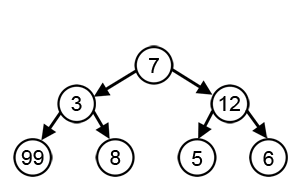

In [300]:
from sklearn.model_selection import GridSearchCV

In [301]:
X_trainGS, X_testGS, y_trainGS, y_testGS = train_test_split(algo_PCA2,Y, test_size=0.3, random_state=42)

# Greedy Search sur KNN

In [302]:
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, scoring = 'accuracy', cv = 10, n_jobs = -1)

KNN_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)
KNN_clf.fit(X_trainGS, y_trainGS)
KNN_clf.best_params_

{'n_neighbors': 4}

In [303]:
KNN_predicted = KNN_clf.predict(X_testGS)

In [304]:
KNN_accuracy = accuracy_score(y_testGS,KNN_predicted)
print(f"KNN accuracy : {round(KNN_accuracy*100,2)}%")

KNN accuracy : 97.73%


<AxesSubplot:>

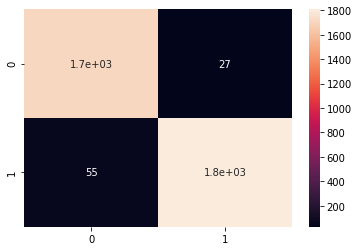

In [305]:
#Matrice de confusion
cm = confusion_matrix(y_testGS, KNN_predicted)
sns.heatmap(cm, annot=True)

Text(0.5, 1.0, 'Affichage KNN')

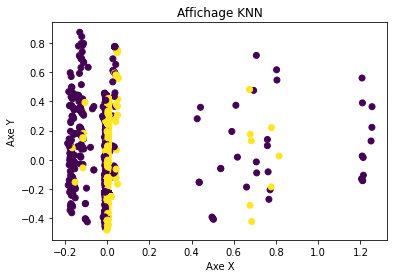

In [331]:
plt.figure()
plt.scatter(X_testGS[:,5],X_testGS[:,1],c=KNN_predicted)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage KNN")

# Greedy Search sur Arbre de Décision

In [332]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'criterion':['gini','entropy'],
          }

D_tree= DecisionTreeClassifier(random_state=7)
DecisionTree_clf = GridSearchCV(D_tree, param_grid=params, n_jobs=-1)

DecisionTree_clf.fit(X_trainGS,y_trainGS)
DecisionTree_clf.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 15}

In [334]:
DecisionTree_predicted = DecisionTree_clf.predict(X_testGS)

In [349]:
D_tree_accuracy = accuracy_score(y_testGS,DecisionTree_predicted)
print(f"DecisionTree accuracy :  {round(D_tree_accuracy*100,2)}%")

DecisionTree accuracy :  97.34%


Text(0.5, 1.0, "Affichage d'arbre de Décision")

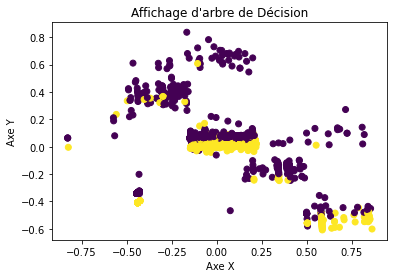

In [348]:
plt.figure()
plt.scatter(X_testGS[:,2],X_testGS[:,3],c=DecisionTree_predicted)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage d'arbre de Décision")

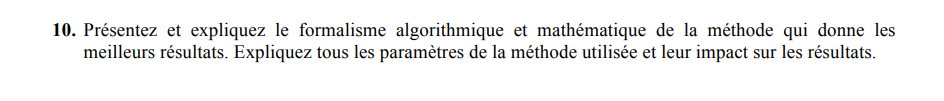

# KNN ALGORITHME

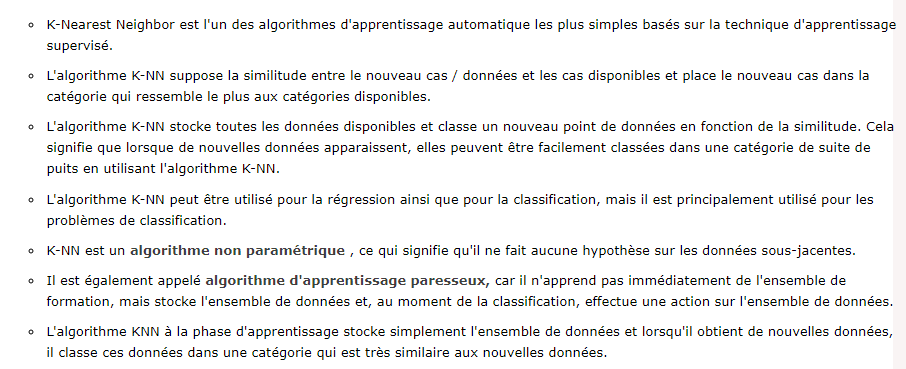

# ** les parametres ici sont les données 
# Et le plus important c'est le k ou le nbr de voisins

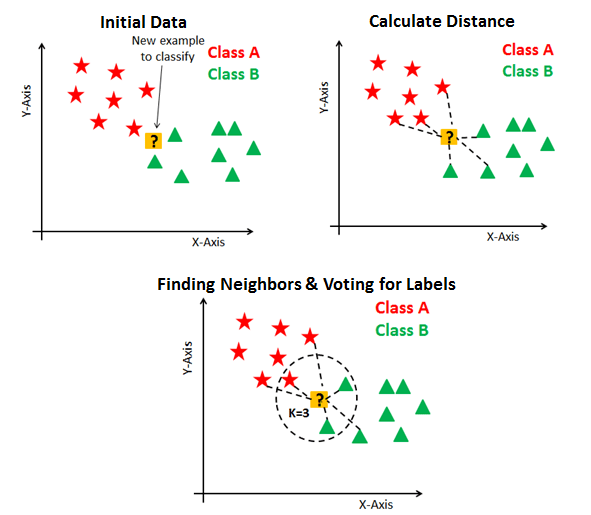